Chi-squared value between analytic and numeric solutions:  0.0008476452017955656


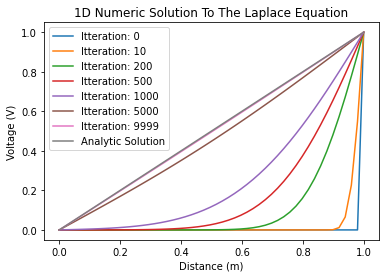

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from scipy.ndimage import convolve
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
itterations = 10000 # Number of itterations to compute
itter_range = range(itterations)

# initialize arrays for x and V
N = 100 # Number of divisions in x
x = np.linspace(0, 1, N)
V_list = np.zeros(N, dtype=np.double)
V_list[-1] = 1
V_select = [0, 10, 200, 500, 1000, 5000, itterations - 1]
select = 0

# define a function to calculate the interior difference and replace the interior value
def interior_difference(arr):
  arr[1:-1] = (arr[0:-2] + arr[2:])/2

# apply interior difference function 10000 times and plot the current curve at select values of the itteration
plt.figure()
for i in itter_range:
  interior_difference(V_list)
  if i == V_select[select]:
    plt.plot(x, V_list, label="Itteration: %d" % (i))
    select += 1

plt.plot(x, x, label="Analytic Solution")
plt.title("1D Numeric Solution To The Laplace Equation")
plt.xlabel("Distance (m)")
plt.ylabel("Voltage (V)")
plt.legend()

chi2 = 0
for i in range(N):
  chi2 += (V_list[i] - x[i])**2

print("Chi-squared value between analytic and numeric solutions: ", chi2)
# The numeric solution is remarkably close to the analytic solution and would likely continue to approach the analytic solution with more itterations.
# Visually, the numeric solution could not be distinguished from the analytic solution without contrasting them.

plt.show()

To extrapolate the poisson equations to a 2D case we need to consider the taylor series expansion of a function $f$ around the point $(x_i, y_j)$. 
The goal will be to isolate $f(x_i, y_j)$ as a function of its neighboring points and the sum of $f$'s second partial derivatives.

$f(x_i + \Delta, y_j) = f(x_i, y_j) + f_x(x_i, y_j)\Delta + \frac{1}{2}f_{xx}(x_i, y_j)\Delta^2 + \frac{1}{6}f_{xxx}(x_i, y_j)\Delta^3 + O(\Delta^4)$

$f(x_i - \Delta, y_j) = f(x_i, y_j) - f_x(x_i, y_j)\Delta + \frac{1}{2}f_{xx}(x_i, y_j)\Delta^2 - \frac{1}{6}f_{xxx}(x_i, y_j)\Delta^3 + O(\Delta^4)$

$f(x_i, y_j + \Delta) = f(x_i, y_j) + f_y(x_i, y_j)\Delta + \frac{1}{2}f_{yy}(x_i, y_j)\Delta^2 + \frac{1}{6}f_{yyy}(x_i, y_j)\Delta^3 + O(\Delta^4)$

$f(x_i, y_j + \Delta) = f(x_i, y_j) - f_y(x_i, y_j)\Delta + \frac{1}{2}f_{yy}(x_i, y_j)\Delta^2 - \frac{1}{6}f_{yyy}(x_i, y_j)\Delta^3 + O(\Delta^4)$

$f(x_i + \Delta, y_j) + f(x_i - \Delta, y_j) = 2f(x_i, y_j) + f_{xx}(x_i, y_j)\Delta^2 + O(\Delta^5)$

$f(x_i, y_j + \Delta) + f(x_i, y_j - \Delta) = 2f(x_i, y_j) + f_{yy}(x_i, y_j)\Delta^2 + O(\Delta^5)$

$f_{adj} = f(x_i + \Delta, y_j) + f(x_i - \Delta, y_j) + f(x_i, y_j + \Delta) + f(x_i, y_j - \Delta) = 4f(x_i, y_j) + f_{xx}(x_i, y_j)\Delta^2 + f_{yy}(x_i, y_j)\Delta^2 + O(\Delta^5)$

let $f$ denote $f(x_i, y_j)$

$f(x_i + \Delta, y_j + \Delta) = f + f_x\Delta + f_y\Delta + \frac{1}{2}f_{xx}\Delta^2 + f_{xy}\Delta^2 + \frac{1}{2}f_{yy}\Delta^2 + \frac{1}{6}f_{xxx}\Delta^3 + \frac{1}{2}f_{xxy}\Delta^3 + \frac{1}{2}f_{yyx}\Delta^3+ \frac{1}{6}f_{yyy}\Delta^3 + O(\Delta^4)$

$f(x_i + \Delta, y_j - \Delta) = f + f_x\Delta - f_y\Delta + \frac{1}{2}f_{xx}\Delta^2 - f_{xy}\Delta^2 + \frac{1}{2}f_{yy}\Delta^2 + \frac{1}{6}f_{xxx}\Delta^3 - \frac{1}{2}f_{xxy}\Delta^3 + \frac{1}{2}f_{yyx}\Delta^3 - \frac{1}{6}f_{yyy}\Delta^3 + O(\Delta^4)$

$f(x_i - \Delta, y_j + \Delta) = f - f_x\Delta + f_y\Delta + \frac{1}{2}f_{xx}\Delta^2 - f_{xy}\Delta^2 + \frac{1}{2}f_{yy}\Delta^2 - \frac{1}{6}f_{xxx}\Delta^3 + \frac{1}{2}f_{xxy}\Delta^3 - \frac{1}{2}f_{yyx}\Delta^3+ \frac{1}{6}f_{yyy}\Delta^3 + O(\Delta^4)$

$f(x_i - \Delta, y_j - \Delta) = f - f_x\Delta - f_y\Delta + \frac{1}{2}f_{xx}\Delta^2 + f_{xy}\Delta^2 + \frac{1}{2}f_{yy}\Delta^2 - \frac{1}{6}f_{xxx}\Delta^3 - \frac{1}{2}f_{xxy}\Delta^3 - \frac{1}{2}f_{yyx}\Delta^3 - \frac{1}{6}f_{yyy}\Delta^3 + O(\Delta^4)$


$f(x_i + \Delta, y_j + \Delta) + f(x_i - \Delta, y_j - \Delta) = 2f + f_{xx}\Delta^2 + 2f_{xy}\Delta^2 + f_{yy}\Delta^2 + O(\Delta^4)$

$f(x_i + \Delta, y_j - \Delta) + f(x_i - \Delta, y_j + \Delta) = 2f + f_{xx}\Delta^2 - 2f_{xy}\Delta^2 + f_{yy}\Delta^2 + O(\Delta^4)$

$f_{cor} = f(x_i + \Delta, y_j + \Delta) + f(x_i - \Delta, y_j - \Delta) + f(x_i + \Delta, y_j - \Delta) + f(x_i - \Delta, y_j + \Delta) = 4f + 2f_{xx}\Delta^2 + 2f_{yy}\Delta^2 + O(\Delta^5)$

$f_{adj} = 4f + f_{xx}\Delta^2 + f_{yy}\Delta^2 + O(\Delta^5)$

$f_{cor} = 4f + 2f_{xx}\Delta^2 + 2f_{yy}\Delta^2 + O(\Delta^5)$

substitute $f = V$ and $V_{xx} + V_{yy} = - \frac{\rho}{\epsilon_0}$

$f_{adj} \approx 4f - \frac{\rho}{\epsilon_0}\Delta^2 $

$f_{cor} \approx 4f - 2\frac{\rho}{\epsilon_0}\Delta^2$

let $a$ and $b$ be the weights of $f_{adj}$ and $f_{cor}$ respectively:

$f(x_i, y_j) \approx \frac{af_{adj} + bf_{cor}}{4(a+b)} + \left(1 + \frac{b}{4(a+b)}\right)\frac{\rho}{\epsilon_0}\Delta^2$


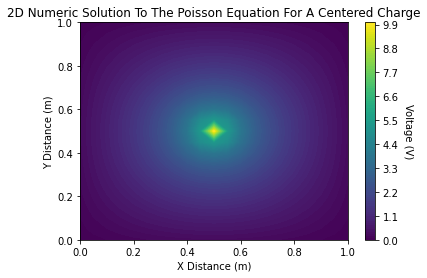

In [ ]:
#---------------------------------------------------------------
# 2D case
#---------------------------------------------------------------

# There are two independanty equations that can be used to calculate the Poisson equations
# The first uses the average of the immediately adjacent components and the other uses the average of the adjacent corners
# The corners average is incapable of propogating all of space and cannot be used exclusively
# While I don't understand error propogation well enough to understand what error these two methods have, i expect that there is a combination of the two that minimizes the error.  

L = 21  # Choose L odd
dL = 1/L   # dL sets the spacing between L points 
midpoint = (L-1) // 2
q = 10
rho_e0 = 0.1
adj_w = 1           
cor_w = np.sqrt(1/2)  # Arbitrary weight estimation 

# The endpoints will not be zero but will be treated as zero by convolve
V_matrix = np.zeros((L, L))
V_matrix[midpoint, midpoint] = q
weight = 1 / (4 * (cor_w + adj_w))
convolution_matrix = weight * np.array([[cor_w, adj_w, cor_w], [adj_w, 0, adj_w], [cor_w, adj_w, cor_w]])
medium_offset = (1 + cor_w * weight) * rho_e0 * dL * dL

# Calculate the interior defference of a matrix
def interior_difference2D(matrix):
  matrix = convolve(matrix, convolution_matrix, mode='constant', cval=0)  # Take the weighted sum of the neighboring points
  matrix += medium_offset         # Offset due to the medium
  matrix[midpoint, midpoint] = q  # Reset the charge at the center. 
  return matrix

# Repeat the interior difference 
for i in itter_range:
  V_matrix = interior_difference2D(V_matrix)

# Plot the contour of the voltages
plt.figure()
x = np.linspace(0, L*dL, L) # The space over which V was considered
x_mesh = np.meshgrid(x, x)  # Mesh grid of x with itself
plt.contourf(*x_mesh, V_matrix, 100)
plt.xlabel("X Distance (m)")
plt.ylabel("Y Distance (m)")
plt.title("2D Numeric Solution To The Poisson Equation For A Centered Charge")
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Voltage (V)', rotation=270)

plt.show()